In [11]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import torch
from transformers import AutoFeatureExtractor, AutoModelForAudioClassification

# Load model and processor from local model
processor = AutoFeatureExtractor.from_pretrained("local_model")
model = AutoModelForAudioClassification.from_pretrained("local_model")

# Function to load and convert any audio type to waveform
def load_audio(file_path, target_sr=16000):
    """
    Load the audio file and convert it to the right sample rate.
    Supports multiple file formats such as MP3, WAV, etc.
    """
    audio, sample_rate = librosa.load(file_path, sr=target_sr)
    return audio, sample_rate

# Function to visualize waveform
def plot_waveform(audio, sample_rate):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sample_rate)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Function to visualize spectrogram
def plot_spectrogram(audio, sample_rate):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

# Function to visualize classification probabilities
def visualize_classification(predictions):
    labels = ['Real', 'AI-Generated']  # Assuming binary classification
    probabilities = torch.softmax(predictions, dim=1).detach().cpu().numpy()[0]

    plt.bar(labels, probabilities, color=['green', 'red'])
    plt.title('Classification: Real vs AI-Generated')
    plt.ylabel('Probability')
    plt.show()




file_path = 'linus-to-musk-DEMO.mp3'


# Step 1: Load and convert the audio file
audio, sample_rate = load_audio(file_path)

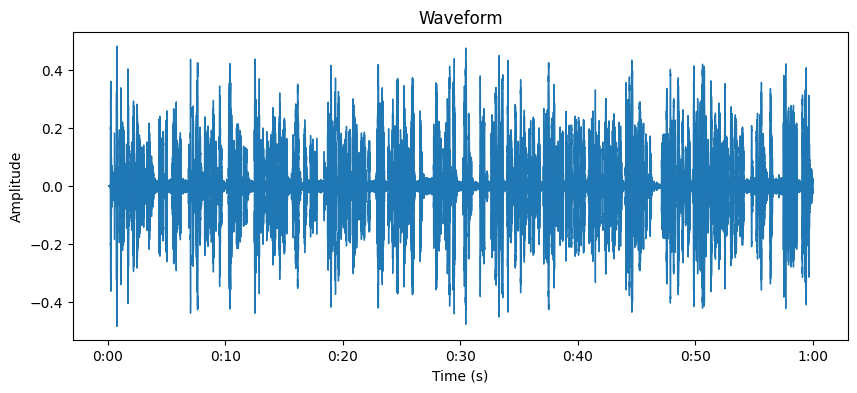

In [12]:
# Step 2: Visualize the waveform
plot_waveform(audio, sample_rate)

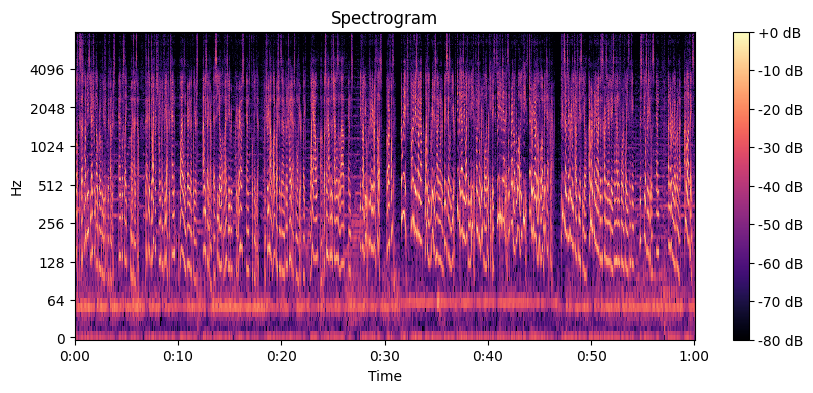

In [13]:
# Step 3: Visualize the spectrogram
plot_spectrogram(audio, sample_rate)

In [14]:
# Step 4: Preprocess the audio for model input
inputs = processor(audio, sampling_rate=sample_rate, return_tensors="pt")

# Step 5: Pass the preprocessed audio to the model
with torch.no_grad():
    predictions = model(**inputs).logits



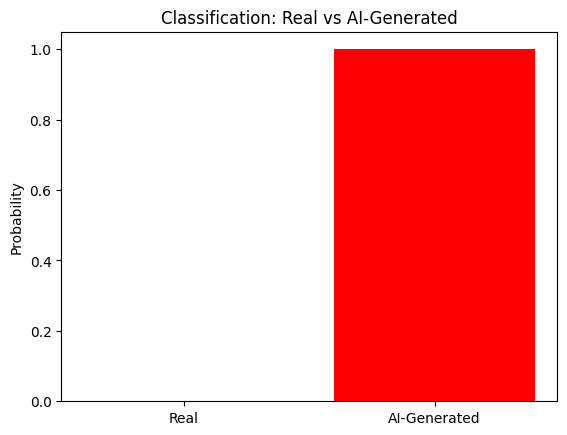

Predicted class: AI-Generated


In [15]:
# Step 6: Visualize the classification result
visualize_classification(predictions)


# Step 7: Return the predicted class (either "Real" or "AI-Generated")
predicted_class = torch.argmax(predictions, dim=-1).item()
result =  'Real' if predicted_class == 0 else 'AI-Generated'

print(f"Predicted class: {result}")